# Analysis of training time vs. dimensionality of target distribution

In [2]:
import os
import sys
import pickle
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from collections import OrderedDict

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%autoreload 2

In [72]:
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
markers = ['o', 's', 'x', 'v', 'h', '^', 'p', '<', 'd', '>', 'o']
linestyles = ['-', '--', ':', '-.', '-', '--', ':', '-.', '-', '--']
plt.style.use('/Users/saforem2/.config/matplotlib/'
               + 'stylelib/ggplot_sam.mplstyle')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.pad'] = 3.5
plt.rcParams['xtick.major.size'] = 3.5
plt.rcParams['xtick.major.width'] = 0.8
plt.rcParams['xtick.minor.pad'] = 3.4
plt.rcParams['xtick.minor.size'] = 2.0
plt.rcParams['xtick.minor.width'] = 0.6

%matplotlib notebook

In [3]:
def load_train_times(log_dir):
    info_dir = os.path.join(log_dir, 'run_info')
    train_times_file = os.path.join(info_dir, 'train_time.pkl')
    if os.path.isfile(train_times_file):
        with open(train_times_file, 'rb') as f:
            train_times_dict = pickle.load(f)
        return train_times_dict
    else:
        print(f"Unable to locate {train_times_file}, file does not exist.")

In [95]:
def split_dict(d):
    keys_arr = np.array(list(d.keys()))
    vals_arr = np.array(list(d.values()))
    return keys_arr, vals_arr

In [14]:
log_dir = '../../timing_logs/'
log_dirs = [os.path.join(log_dir, i) 
            for i in os.listdir(log_dir) 
            if os.path.isdir(os.path.join(log_dir, i))]

In [29]:
tt_dict = {}
for d in log_dirs:
    name = d.split('/')[-1]
    name = name.split('_')
    name = f'tt_dim{name[2]}'  # tt = train_times
    tt_dict[name] = load_train_times(d)

In [100]:
tt_diffs_dict = {}
tt_per_step_dict = {}
for key, val in tt_dict.items():
    tt_diffs_dict[key] = {}
    steps = np.array(list(val.keys()))
    dsteps = np.array(list(val.keys())[1:])
    times = np.array(list(val.values()))
    step_diffs = steps[1:] - steps[:-1]
    time_diffs = times[1:] - times[:-1]
    time_diffs_per_step = time_diffs / step_diffs
    tt_diffs_dict[key] = dict(zip(dsteps, diffs))
    tt_per_step_dict[key] = time_diffs_per_step
    
def split_dim(d):
    return d[0].split('_')[-1].lstrip('dim')

tt_diffs_dict = OrderedDict(sorted(tt_diffs_dict.items(), 
                                   key=lambda d: int(split_dim(d))))
tt_per_step_dict = OrderedDict(sorted(tt_per_step_dict.items(),
                                      key=lambda d: int(split_dim(d))))

In [101]:
tt_per_step_dict

OrderedDict([('tt_dim2',
              array([0.19772904, 0.32416768, 0.13601656, 0.09344698, 0.06018871,
                     0.06327097, 0.06363277, 0.05690976, 0.06178653, 0.06176403,
                     0.05193562, 0.07022481, 0.05590428, 0.07622685, 0.06538784,
                     0.06054523, 0.06362264, 0.05721828, 0.05619039, 0.07240982,
                     0.0850694 , 0.07372423])),
             ('tt_dim5',
              array([0.20601501, 0.23021029, 0.23054987, 0.23716465, 0.23084252,
                     0.22645778, 0.24347823, 0.24149395, 0.23873324, 0.21019114,
                     0.241517  , 0.26964979, 0.24838683, 0.2345853 , 0.24877207,
                     0.22819963, 0.31674407, 0.25647007, 0.28364187, 0.28386151,
                     0.3590919 , 0.29999817, 0.26631712, 0.20339485, 0.25002552,
                     0.23349486, 0.24820131, 0.24212151, 0.30399816, 0.22572412,
                     0.25238266, 0.23456066, 0.23036937, 0.22762584, 0.23088778,
           

In [105]:
tt_per_step_dict.keys()

odict_keys(['tt_dim2', 'tt_dim5', 'tt_dim10', 'tt_dim12', 'tt_dim15', 'tt_dim16', 'tt_dim20'])

In [139]:
from utils.data_utils import calc_avg_vals_errors, block_resampling

In [148]:
#_dict = {}
#num_blocks = np.arange(0, 500, 100)
#num_blocks[0] = 2
#for nb in num_blocks:
tt_per_step_arr = []
for key, val in tt_per_step_dict.items():
    dimension = int(key.split('_')[-1].lstrip('dim'))
    avg, err = calc_avg_vals_errors(val, num_blocks=int(len(val)**(1./3)))
    #avg_time_per_step = np.mean(val)
    #std_time_per_step = np.std(val)
    tt_per_step_arr.append([dimension, avg, err])
tt_per_step_arr = np.array(tt_per_step_arr)
#_dict[nb] = tt_per_step_arr

<IPython.core.display.Javascript object>


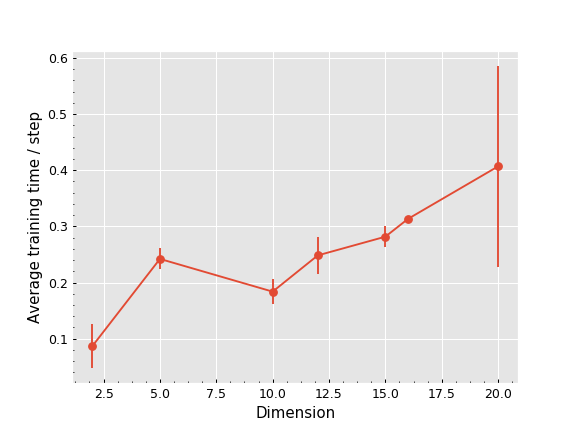

<ErrorbarContainer object of 3 artists>

Text(0.5, 0, 'Dimension')

Text(0, 0.5, 'Average training time / step')

<bound method Axes.set_title of <matplotlib.axes._subplots.AxesSubplot object at 0x131ff8da0>>

In [151]:
fig, ax = plt.subplots()
i = 0
#for key, val in _dict.items():
ax.errorbar(tt_per_step_arr[:, 0], tt_per_step_arr[:, 1], 
            yerr=tt_per_step_arr[:, 2],
            color='C0', marker='o', ls='-')
    
#ax.legend(loc='best')
ax.set_xlabel('Dimension')
ax.set_ylabel('Average training time / step')
ax.set_title
plt.show()

In [ ]:
fig, ax = plt.subplots()
i = 0
for key, val in tt_diffs_dict.items():
    leg_label = 'dimension ' + key.split('_')[-1].lstrip('dim')
    
    ax.plot(steps_arr[::5], t_diffs_arr[::5], 
            color=colors[i], marker=markers[i],
            ls=linestyles[i], label=leg_label)
    i += 1
ax.set_xlabel('Training step')
ax.set_ylabel('Cumulative training time')
ax.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


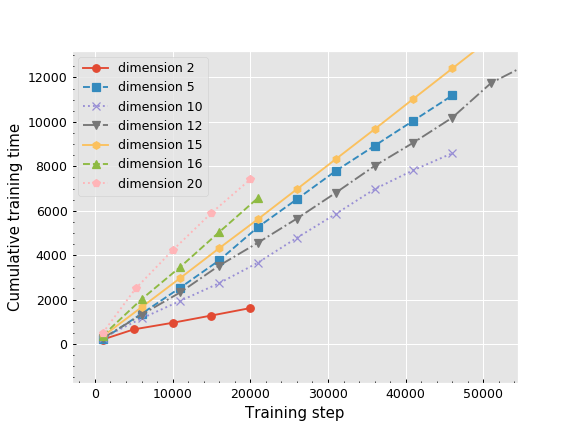

Text(0.5, 0, 'Training step')

Text(0, 0.5, 'Cumulative training time')

In [97]:
fig, ax = plt.subplots()
i = 0
for key, val in tt_diffs_dict.items():
    leg_label = 'dimension ' + key.split('_')[-1].lstrip('dim')
    steps_arr, t_diffs_arr = split_dict(val)
    ax.plot(steps_arr[::5], t_diffs_arr[::5], 
            color=colors[i], marker=markers[i],
            ls=linestyles[i], label=leg_label)
    i += 1
ax.set_xlabel('Training step')
ax.set_ylabel('Cumulative training time')
ax.legend(loc='best')
plt.show()

In [98]:
steps_dict = {}
for key, val in tt_diffs_dict.items():
    #leg_label = 'dimension ' + key.split('_')[-1].lstrip('dim')
    #steps_arr, t_diffs_arr = split_dict(val)
    steps_dict[key], _ = split_dict(val)

In [99]:
steps_dict

{'tt_dim2': array([ 1000,  1561,  2000,  3000,  4000,  5000,  6000,  7000,  8000,
         9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000,
        18000, 19000, 20000, 21000]),
 'tt_dim5': array([ 1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
        10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000,
        19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000,
        28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000,
        37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000,
        46000, 47000, 48000]),
 'tt_dim10': array([ 1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
        10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000,
        19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000,
        28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000,
        37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000,
        46000, 47000, 48000, 49000, 50000]),
